<h1><center>TP5 : Descente de gradient</center></h1>

## Calcule l’expression analytique de la fonction E(x) = (x-1)(x-2)(x-3)(x-5) et sa dérivée.

In [145]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn import datasets
from scipy import stats

In [146]:
# define fonction E(x)
def E(x):
    return (x-1)*(x-2)*(x-3)*(x-5)

In [147]:
# define derive of fonction E(x)
def derive_E(x):
    return (4*(x**3))-(33*(x**2))+(82*x)-61

## Implémentez l’algorithme DG

In [148]:
def gradient(step, initial_point, derived_fonction, eps=0.01,max_iter=1000):
    x = initial_point
    for i in range(max_iter):
        x_prev = x
        x = x_prev - step*N(derived_fonction(x_prev)).evalf()
        if abs(x-x_prev) < eps:
            return [x, (i+1)]
    return [x, max_iter]

## test d’algorithme implémenté et affichage de minimum trouvé, ainsi que E(xmin) et le nombre d’itérations.
- x0 = 5 et step = 0,001
- x0 = 5 et step = 0,01
- x0 = 5 et step = 0,1
- x0 = 5 et step= 0,17
- x0 = 5 et step = 1
- x0 = 0 et step = 0,001

In [149]:
def show_res(vect,derive_E):
    print("***************************************************************")
    final_x,nb_itt = gradient(vect[0],vect[1],derive_E)
    all_final_x.append(final_x)
    print("for initial point = ",vect[1]," and step = ",vect[0]," ==> final x =  ",final_x," with ",nb_itt," iteration")
    print("E(",final_x,") = ",E(final_x))
    print("***************************************************************")

In [150]:
all_final_x = []
show_res([0.001,5],derive_E)
show_res([0.01,5],derive_E)
show_res([0.1,5],derive_E)
show_res([0.17,5],derive_E)
show_res([1,5],derive_E)
show_res([0.001,0],derive_E)

***************************************************************
for initial point =  5  and step =  0.001  ==> final x =   4.66148331568632  with  22  iteration
E( 4.66148331568632 ) =  -5.48096300209431
***************************************************************
***************************************************************
for initial point =  5  and step =  0.01  ==> final x =   4.36100829491372  with  10  iteration
E( 4.36100829491372 ) =  -6.90117578513080
***************************************************************
***************************************************************
for initial point =  5  and step =  0.1  ==> final x =   4.10499078940640  with  1000  iteration
E( 4.10499078940640 ) =  -6.46393050781844
***************************************************************
***************************************************************
for initial point =  5  and step =  0.17  ==> final x =   1.65839377699626  with  1000  iteration
E( 1.65839377699626 ) =  -1.0083047

## Visualisation d’évolution des minimums de la fonction E(x) trouvés au cours des itérations.

In [151]:
curve = [N(E(x)).evalf() for x in np.arange(0, 6, 0.1)]
all_final_x.pop(4)
all_final_Ex = [E(x) for x in all_final_x]

[4.66148331568632, 4.36100829491372, 4.10499078940640, 1.65839377699626, 0.949407118070548]
[-5.48096300209431, -6.90117578513080, -6.46393050781844, -1.00830478005376, 0.441491059862554]


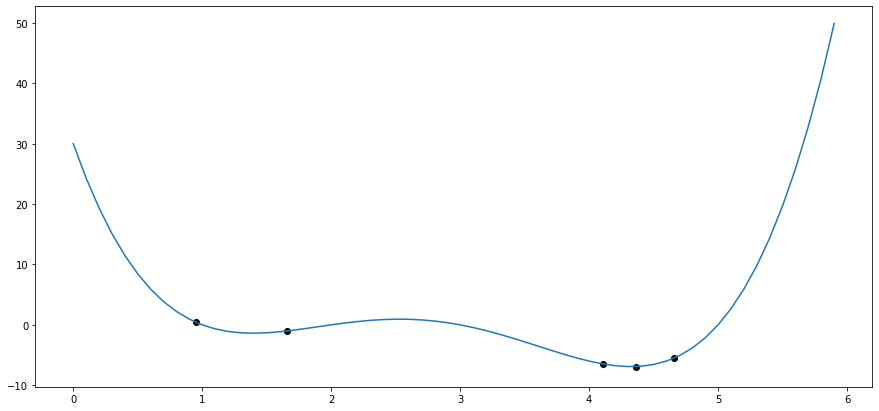

In [153]:
print(all_final_x)
print(all_final_Ex)
plt.figure()
plt.plot(np.arange(0, 6, 0.1), curve)
plt.scatter(all_final_x, all_final_Ex, c='black')

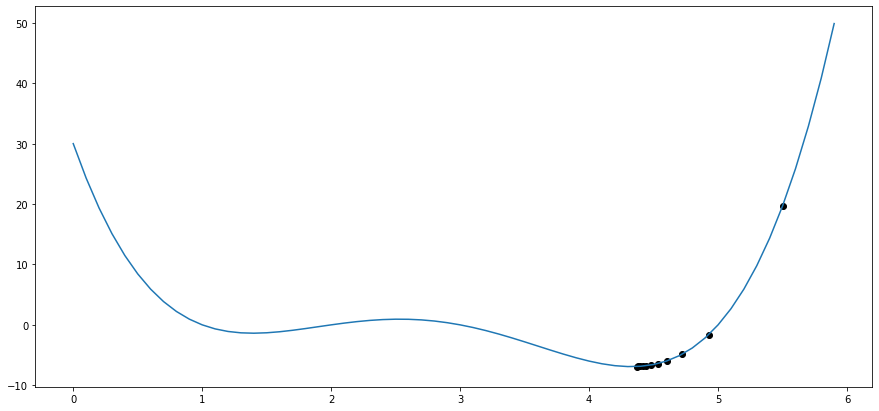

In [158]:
plt.plot(np.arange(0, 6, 0.1), curve)
step, initial_point, derived_fonction, eps, max_iter = 0.01,5.5,derive_E,0.01,1000
x = initial_point
for i in range(max_iter):
    plt.scatter(x, E(x), c='black')
    x_prev = x
    x = x_prev - step*N(derived_fonction(x_prev)).evalf()
    if abs(x-x_prev) < eps:
        break

# Descente de gradient pour la régression linéaire

## Calculation des dérivées partielles de la fonction G(a; b) selon a et b

In [159]:
# In our example, G(x,y) = SUM(ax+y - y)
def G(x, y, a, b):
    return np.sum((a*x+b-y)**2)
# define derive ohttp://localhost:8888/notebooks/TP5%20Descente%20de%20gradient.ipynb#Impl%C3%A9mentez-l%E2%80%99algorithme-DGRf fonction
def derive_G(x, y, a, b):
    return {'dx': 2*(a*x**2+b*x-y*x), 'dy': 2*(a*x+b-y)}

def y(x, a, b):
    return (a*x+b)

## Implémentez l’algorithme DGR

In [160]:
#Gradient Descent implied for a regression linear case with data
def gradient_reg(max_iter, step, x, y, df,eps = 0.01):
    #Const
    nb_sample_data = x.shape[0]
    rg_sample = range(1, nb_sample_data)
    
    #initialisation
    a = 5 #np.random.random(x.shape[1])
    b = 5 #np.random.random(x.shape[1])
    E = sum([a*x[j]+b-y[j] for j in rg_sample]) 
    
#     print(E)
    for i in range(max_iter):
        #Compute gradient
        grad_a = sum([2*(a*x[j]**2+b*x[j]-y[j]*x[j]) for j in rg_sample])
        grad_b = sum([2*(a*x[j]+b-y[j]) for j in rg_sample])
        
        #Descente de gradient
        a = a - step * grad_a
        b = b - step * grad_b

        
        #Compute error
        e = sum([a*x[j]+b-y[j] for j in rg_sample])

        if abs(E-e) <= eps:
            return ({'a': a, 'b': b}, i)
            
        E = e

    return ({'a': a, 'b': b}, max_iter)

## test d’algorithme implémenté

In [161]:
x_reg, y_reg = datasets.make_regression(n_samples=100, n_features=1, noise=7)
all_final_reg = []
print(x_reg.reshape(100).shape)
print(y_reg.shape)

(100,)
(100,)


In [162]:
def show_res_reg(vect,derive_G):
    print("***************************************************************")
    res,nb_itt = gradient_reg(vect[0],vect[1],vect[2],vect[3],derive_G)
    print("for initial max iteration = ",vect[0]," , step = ",vect[1])
    print(' ==> final_a = ',res['a'],' final_b = ',res['b'],'nb_iteration = ',ite)
    pry = [y(x_d[0],res['a'],res['b']) for x_d in x_reg]
#     print("final result =  ",G(x_reg,y_reg,res['a'],res['b']))
    print('E(', x_reg[0][0], ') = ', pry[0])
    all_final_reg.append(pry)
    print("***************************************************************")

## Affichage des resultas trouvés 

In [163]:
all_final_reg = []
show_res_reg([100,0.001,x_reg,y_reg],derive_G)
show_res_reg([500,0.001,x_reg,y_reg],derive_G)
show_res_reg([1000,0.001,x_reg,y_reg],derive_G)
show_res_reg([100,0.01,x_reg,y_reg],derive_G)
show_res_reg([100,1,x_reg,y_reg],derive_G)

***************************************************************
for initial max iteration =  100  , step =  0.001
 ==> final_a =  [26.99215092]  final_b =  [-0.95238875] nb_iteration =  54
E( -0.7625539364307679 ) =  [-21.53535968]
***************************************************************
***************************************************************
for initial max iteration =  500  , step =  0.001
 ==> final_a =  [26.99215092]  final_b =  [-0.95238875] nb_iteration =  54
E( -0.7625539364307679 ) =  [-21.53535968]
***************************************************************
***************************************************************
for initial max iteration =  1000  , step =  0.001
 ==> final_a =  [26.99215092]  final_b =  [-0.95238875] nb_iteration =  54
E( -0.7625539364307679 ) =  [-21.53535968]
***************************************************************
***************************************************************
for initial max iteration =  100  , step =  0.0

## utilisation des stats.linregress de scipy

In [164]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_reg.reshape(100), y_reg)
np.array(all_final_reg[0]).shape

(100, 1)

## Visualisation

r-squared: 0.9536131168684577
r-squared: 0.9536131168684577
r-squared: 0.9536131168684577


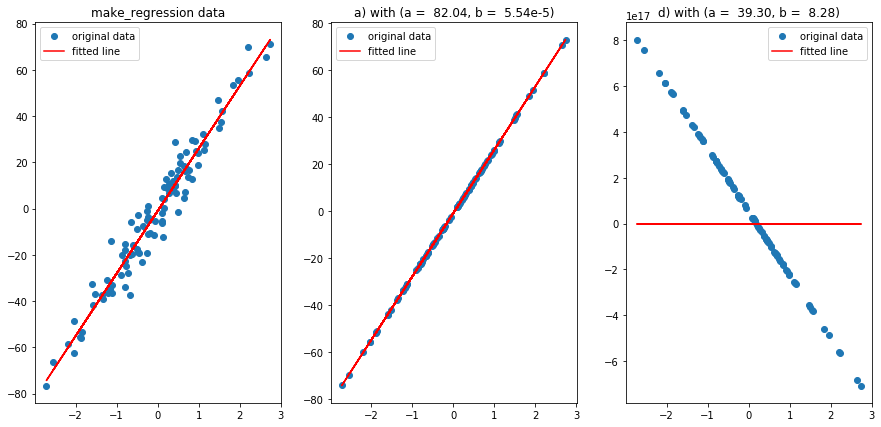

In [167]:
print("r-squared:", r_value**2)

plt.rcParams["figure.figsize"] = (15,7)
plt.subplot(1, 3, 1)
plt.plot(x_reg, y_reg, 'o', label='original data')
plt.plot(x_reg, intercept + slope*x_reg, 'r', label='fitted line')
plt.title('make_regression data')
plt.legend()


print("r-squared:", r_value**2)
plt.subplot(1, 3, 2)
plt.plot(x_reg, all_final_reg[0], 'o', label='original data')
plt.plot(x_reg, intercept + slope*x_reg, 'r', label='fitted line')
plt.title('a) with (a =  82.04, b =  5.54e-5)')
plt.legend()

print("r-squared:", r_value**2)
plt.subplot(1, 3, 3)
plt.plot(x_reg, all_final_reg[3], 'o', label='original data')
plt.plot(x_reg, intercept + slope*x_reg, 'r', label='fitted line')
plt.title('d) with (a =  39.30, b =  8.28)')
plt.legend()

plt.show()